### Visualization without Echo

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from system import AtomCavitySystem


def run_simulation(gamma, kappa, beta):
    # Create system
    system = AtomCavitySystem(N=10, g=(0.1 * 2 * np.pi), w0=(1.0 * 2 * np.pi),
                              gamma=gamma, kappa=kappa, beta=beta)

    # Build Hamiltonian
    H = system.create_hamiltonian()

    # Initial state |0⟩_cavity ⊗ |+⟩_atom
    psi11 = system.create_initial_state('0', '+')

    # Collapse operators
    c_ops = system.create_collapse_operators(leaking=True, decay=True, dephasing=True)

    # Expectation values
    e_ops = system.create_expectation_values(
        number_atom=True,
        number_cavity=True,
        coherence_ge=True,
        coherence_eg=True
    )

    # Time evolution
    times = np.linspace(0, 20, 500)
    result = qt.mesolve(H, psi11, times, c_ops, e_ops)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(times, result.expect[0], label="⟨n_atom⟩")
    plt.plot(times, result.expect[1], label="⟨n_cavity⟩")
    plt.plot(times, np.abs(result.expect[2]), label="|coherence|")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Expectation value")
    plt.grid(True)
    plt.show()

# Create interactive sliders
interact(run_simulation,
         gamma=FloatSlider(min=0, max=0.5, step=0.01, value=0.1, description="Decay γ"),
         kappa=FloatSlider(min=0, max=0.5, step=0.01, value=0.05, description="Leaking κ"),
         beta=FloatSlider(min=0, max=0.5, step=0.01, value=0.02, description="Dephasing β"));


interactive(children=(FloatSlider(value=0.1, description='Decay γ', max=0.5, step=0.01), FloatSlider(value=0.0…

### Adding an Echo

In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from system import AtomCavitySystem

def run_simulation(gamma, kappa, beta, t_echo):
    # Create system
    system = AtomCavitySystem(N=10, g=(0.1 * 2 * np.pi), w0=(1.0 * 2 * np.pi),
                              gamma=gamma, kappa=kappa, beta=beta)

    # Build Hamiltonian
    H = system.create_hamiltonian()

    # Initial state |0⟩_cavity ⊗ |+⟩_atom
    psi0 = system.create_initial_state('1', '+')

    # Collapse operators
    c_ops = system.create_collapse_operators(leaking=True, decay=True, dephasing=True)

    # Expectation values
    e_ops = system.create_expectation_values(
        number_atom=True,
        number_cavity=True,
        coherence_ge=True,
        coherence_eg=True
    )

    # Total simulation time
    t_max = 100
    times1 = np.linspace(0, t_echo, 250)
    times2 = np.linspace(t_echo, t_max, 250)

    # First evolution until t_echo
    result1 = qt.mesolve(H, psi0, times1, c_ops, e_ops, options=qt.Options(store_states=True))

    # Apply π-pulse (σx on atom)
    X_pi = qt.tensor(qt.qeye(system.N), qt.sigmax())
    rho_mid = result1.states[-1] 
    rho_mid_pulsed = X_pi * rho_mid * X_pi.dag()

    # Continue evolution after echo
    result2 = qt.mesolve(H, rho_mid_pulsed, times2, c_ops, e_ops)

    # Combine results
    times_full = np.concatenate([times1, times2])
    result_full = [np.concatenate([result1.expect[i], result2.expect[i]]) for i in range(len(e_ops))]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(times_full, result_full[0], label="⟨n_atom⟩")
    plt.plot(times_full, result_full[1], label="⟨n_cavity⟩")
    plt.plot(times_full, np.abs(result_full[2]), label="|coherence|")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Expectation value")
    plt.grid(True)
    plt.show()


# Interactive sliders
interact(run_simulation,
         gamma=FloatSlider(min=0, max=0.5, step=0.01, value=0.1, description="Decay γ"),
         kappa=FloatSlider(min=0, max=0.5, step=0.01, value=0.05, description="Leaking κ"),
         beta=FloatSlider(min=0, max=0.5, step=0.01, value=0.02, description="Dephasing β"),
         t_echo=FloatSlider(min=0.1, max=60, step=0.1, value=10, description="Echo time"));


interactive(children=(FloatSlider(value=0.1, description='Decay γ', max=0.5, step=0.01), FloatSlider(value=0.0…

In [3]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from system import AtomCavitySystem

def run_simulation(gamma, kappa, beta, t_echo):
    # Create system
    system = AtomCavitySystem(N=10, g=(0.1 * 2 * np.pi), w0=(1.0 * 2 * np.pi),
                              gamma=gamma, kappa=kappa, beta=beta)

    # Build Hamiltonian
    H = system.create_hamiltonian()

    # Initial state |1⟩_cavity ⊗ |+⟩_atom
    psi0 = system.create_initial_state('1', '+')

    # Collapse operators
    c_ops = system.create_collapse_operators(leaking=True, decay=True, dephasing=True)

    # Expectation values
    e_ops = system.create_expectation_values(
        number_atom=True,
        number_cavity=True,
        coherence_ge=True,
        coherence_eg=True
    )

    # Total simulation time
    t_max = 60
    times1 = np.linspace(0, t_echo, 250)
    times2 = np.linspace(t_echo, t_max, 250)

    # First evolution until t_echo
    result1 = qt.mesolve(H, psi0, times1, c_ops, e_ops, options=qt.Options(store_states=True))

    # Apply π-pulse (σx on atom)
    X_pi = qt.tensor(qt.qeye(system.N), qt.sigmax())
    rho_mid = result1.states[-1]
    rho_mid_pulsed = X_pi * rho_mid

    # Continue evolution after echo
    result2 = qt.mesolve(H, rho_mid_pulsed, times2, c_ops, e_ops)

    # Combine results
    times_full = np.concatenate([times1, times2])
    result_full = [np.concatenate([result1.expect[i], result2.expect[i]]) for i in range(len(e_ops))]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(times_full, result_full[0], label="⟨n_atom⟩")
    plt.plot(times_full, result_full[1], label="⟨n_cavity⟩")
    plt.plot(times_full, np.abs(result_full[2]), label="|coherence|")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Expectation value")
    plt.grid(True)
    plt.show()


# Interactive sliders
interact(run_simulation,
         gamma=FloatSlider(min=0, max=0.5, step=0.01, value=0.1, description="Decay γ"),
         kappa=FloatSlider(min=0, max=0.5, step=0.01, value=0.05, description="Leaking κ"),
         beta=FloatSlider(min=0, max=0.5, step=0.01, value=0.02, description="Dephasing β"),
         t_echo=FloatSlider(min=0.1, max=60, step=0.1, value=10, description="Echo time"));


interactive(children=(FloatSlider(value=0.1, description='Decay γ', max=0.5, step=0.01), FloatSlider(value=0.0…

### Visualization of the atom state on the Bloch sphere

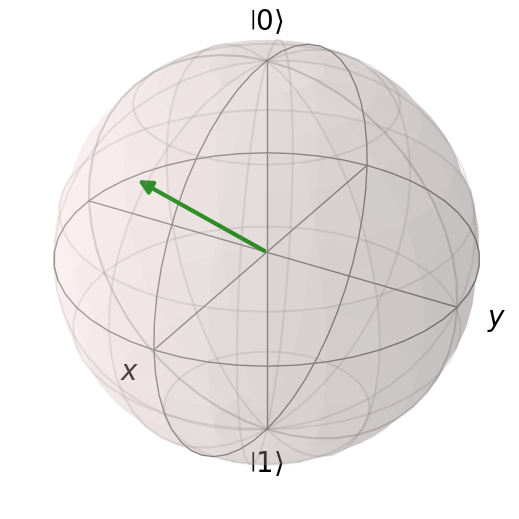

In [4]:
from system import AtomCavitySystem

# Parameters
N = 5
g = 1.0
w0 = 1.0

system = AtomCavitySystem(N, g, w0)

# Hamiltonian and initial state
H = system.create_hamiltonian()
rho0 = system.create_initial_state('0', '+')

# Time evolution
tlist = np.linspace(0, 10, 100)
result = qt.mesolve(H, rho0, tlist, system.create_collapse_operators(leaking=True), [])

# Get state at final time
rho_final = result.states[-1]

# Plot on Bloch sphere
system.plot_bloch_vector(rho_final)


In [6]:
from qutip import Bloch, sigmax, sigmay, sigmaz
import matplotlib.pyplot as plt
import imageio
import os

# Compute Bloch vectors for all time steps
bloch_vectors = []
for rho in result.states:
    rho_atom = system.get_reduced_atom_state(rho)
    vector = [
        qt.expect(sigmax(), rho_atom),
        qt.expect(sigmay(), rho_atom),
        qt.expect(sigmaz(), rho_atom)
    ]
    bloch_vectors.append(vector)

# Prepare Bloch sphere
b = Bloch()
b.vector_color = ['r']
b.point_color = ['b']

# File to save animation
filename = "bloch_animation.gif"

# Add trajectory points one by one and save each frame
frames = []
for i, vec in enumerate(bloch_vectors):
    b.clear()
    b.add_vectors(vec)
    
    # Save current frame as image
    frame_file = f"frame_{i}.png"
    b.save(frame_file)   # saves as PNG
    frames.append(frame_file)

# Convert frames to GIF using imageio
images = [imageio.imread(f) for f in frames]
imageio.mimsave(filename, images, duration=0.05)  # 0.05 sec per frame

# Optional: clean up individual frames
for f in frames:
    os.remove(f)

print(f"Animation saved as {filename}")


C:\Users\SophiaCarmenSimon\AppData\Local\Temp\ipykernel_22844\1614062267.py:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(f) for f in frames]


Animation saved as bloch_animation.gif
